<a href="https://colab.research.google.com/github/BhavyaniD/GIS/blob/main/GIS_PS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective of the Project

The project aims to successfully create a itenary planner using recommendation engine algorithm and GIS  libraries. The following Plan of Action will be implemented for accomplishing the project.

A. Gather all the necessary data
1. find data of all venues of recreation in NYC  ✔
2. Find the parking spaces data ✔
3. find major tourist attraction data
4. find/ create data for venue ratings
5. subway stations data ✔
6. road network ✔

B. Create the following categories df:
1. must visit for toursit
2. place by age group
3. categorize: dine-in, bar, street-food, shopping, parks, historical, attractions
4. ratings for each place

*Draw a pie chart borough wise
*draw a bar chart of venues
*4star and 5 star rated bar chart category wise

C. Plot the following using GIS Libraries
1. NYC along with its 5 borough - Map 1 ✔
2. Plot all the venues - Map 2
3. Now star mark all the best rated venues and must try - Map 3
4. Add to Map3, the parking lots - Map 4

D. Take the following inputs from user
1. Current Location
2. Radius of Exloration
3. tourist or not
4. mode of travel
5. Age
6. Activities
7. Rating required

E. Map the following
1. All places near the current location based on raduis - Map 5
(use different symbols from emoji lbrary to depict different locations
ex: beer glass emoji for bar, etc)

F. Create the model where the inputs from step-D are taken and based on the user preference recommend top 5 places

G. plot the Top 5 places on the map along with the nearby parking spaces of subways - Map 6

H. Based on the mode of travel, give the route to travel from one place to another effectively

I. plot the route on map along with the time required to reach there
Find the distance matrix and recommend the order of travel accordingly
ex: top 5 places are A, B, C ,D, E then D is the closest to current location, and then E is the next nearest and so on. - MAap 7

The website URLs for the data sets used for this project are attached below. (Few additional datasets are yet to be added)

1. Shapefile of NYC and its boroughs:
https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm

2. Venues in NYC:
https://data.cityofnewyork.us/City-Government/Points-Of-Interest/rxuy-2muj

3. Parking lots :
https://data.world/city-of-ny/h7zy-iq3d/workspace/file?filename=parking-lot-1.csv

4. Subway Network of NYC:
https://data.cityofnewyork.us/Transportation/Subway-Lines/3qz8-muuu

5. Road network of NYC:
https://streets.planning.nyc.gov/about?lat=40.7115&layer-groups=%5B%22amendments%22%2C%22citymap%22%2C%22pierhead-bulkhead-lines%22%2C%22street-centerlines%22%5D&lng=-73.9504&zoom=9.5

6.

In [1]:
#pip install necessary libraries
!pip install geopandas==1.0.1
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.2 MB/s eta 0:00:00


In [2]:
#import all necessary libraries

import pandas as pd #data management
import numpy as np #mathematics
import matplotlib.pyplot as plt #viz
import matplotlib.colors as mcolors
import seaborn as sns  #adv viz
import os, zipfile #basics
from google.colab import files
from google.colab import data_table
data_table.enable_dataframe_formatter()
import geopandas as gpd #gis/maps
from shapely.geometry import Point
import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Load the shapefile of NYC
nyc = gpd.read_file("/content/Borough Boundaries.zip")


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'New York City and Its Boroughs')

Text(0.5, 23.52222222222222, 'Longitude')

Text(96.39215564756849, 0.5, 'Latitude')

<Figure size 1000x800 with 0 Axes>

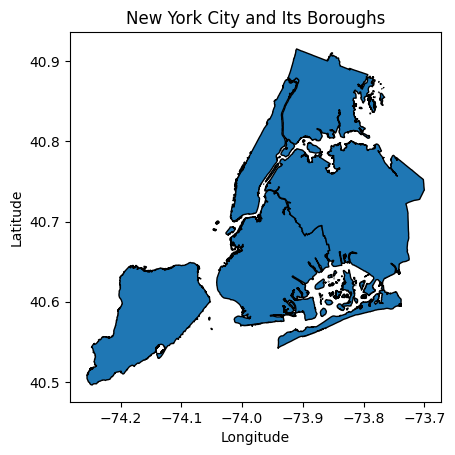

In [4]:
# Handle multi-part geometries
nyc = nyc.explode(index_parts=False)

# Plotting NYC and its boroughs
plt.figure(figsize=(10, 8))
nyc.plot(edgecolor='black')
plt.title('New York City and Its Boroughs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'New York City and Its Boroughs')

Text(0.5, 23.52222222222222, 'Longitude')

Text(96.39215564756849, 0.5, 'Latitude')

<Figure size 1200x1000 with 0 Axes>

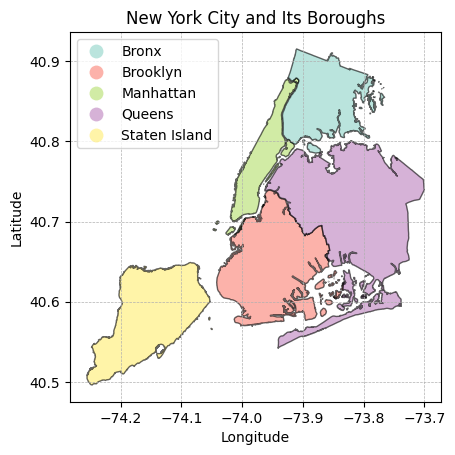

In [5]:
#NYC and its Boroughs with names

# Adding Categorical column
nyc['borough'] = nyc['boro_name']

# Plotting NYC and its boroughs with aesthetic improvements
plt.figure(figsize=(12, 10))
ax = nyc.plot(
    column='borough',  # Column to use for coloring
    edgecolor='black',
    alpha=0.6,
    cmap='Set3',
    legend=True,
    legend_kwds={'loc': 'upper left', 'fontsize': 10}
)

# Additional styling
ax.set_title('New York City and Its Boroughs')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.grid(visible=True, linestyle='--', linewidth=0.5)

plt.show()


 **PS - 1**

Research to find the following information and produce thematic maps:

a. most visited to least visited

b. safest to least safe

c. most expensive to least expensive

d. add emojis of top 3 things to do in that borough

In [6]:
# Load the nyc information file

nyc_information = pd.read_excel("/content/NYC_Boroughs_Information.xlsx")
nyc_information.head()

,Borough,Most Visited Rank,Safest Rank,Most Expensive Rank,Top 3 Things to Do
0,Manhattan,1,2,1,"🗽 Statue of Liberty, 🎭 Broadway Shows, 🏙️ Empi..."
1,Brooklyn,2,4,2,"🌉 Brooklyn Bridge, 🎡 Coney Island, 🎨 Brooklyn ..."
2,Queens,3,3,3,"🌍 Flushing Meadows Park, 🎥 Museum of the Movin..."
3,The Bronx,4,5,5,"⚾ Yankee Stadium, 🐘 Bronx Zoo, 🌿 New York Bota..."
4,Staten Island,5,1,4,"🛳️ Staten Island Ferry, 🏰 Historic Richmond To..."


In [7]:
# Step 1: Create dictionaries for each variable with borough names as keys
borough_rank_dict_visited = dict(zip(nyc_information['Borough'], nyc_information['Most Visited Rank']))
borough_rank_dict_expensive = dict(zip(nyc_information['Borough'], nyc_information['Most Expensive Rank']))
borough_rank_dict_safety = dict(zip(nyc_information['Borough'], nyc_information['Safest Rank']))


In [21]:

# Step 2: Map the borough names to thematic values for each variable
nyc['visited_rank'] = nyc['boro_name'].map(borough_rank_dict_visited)
nyc['expensive_rank'] = nyc['boro_name'].map(borough_rank_dict_expensive)
nyc['safety_rank'] = nyc['boro_name'].map(borough_rank_dict_safety)


In [22]:
# Step 4: Define a colormap as copper
cmap = plt.get_cmap('copper')

# Normalize the rank values to be between 0 and 1 for color mapping
norm_visited = mcolors.Normalize(vmin=nyc['visited_rank'].min(), vmax=nyc['visited_rank'].max())
norm_expensive = mcolors.Normalize(vmin=nyc['expensive_rank'].min(), vmax=nyc['expensive_rank'].max())
norm_safety = mcolors.Normalize(vmin=nyc['safety_rank'].min(), vmax=nyc['safety_rank'].max())

In [23]:
# Apply the colormap to the rank columns
nyc['visited_color'] = nyc['visited_rank'].apply(lambda x: cmap(norm_visited(x)))
nyc['expensive_color'] = nyc['expensive_rank'].apply(lambda x: cmap(norm_expensive(x)))
nyc['safety_color'] = nyc['safety_rank'].apply(lambda x: cmap(norm_safety(x)))


<Axes: >

<Axes: >

Text(0.5, 1.0, 'Most Visited Boroughs')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Most Expensive Boroughs')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Safest Boroughs')

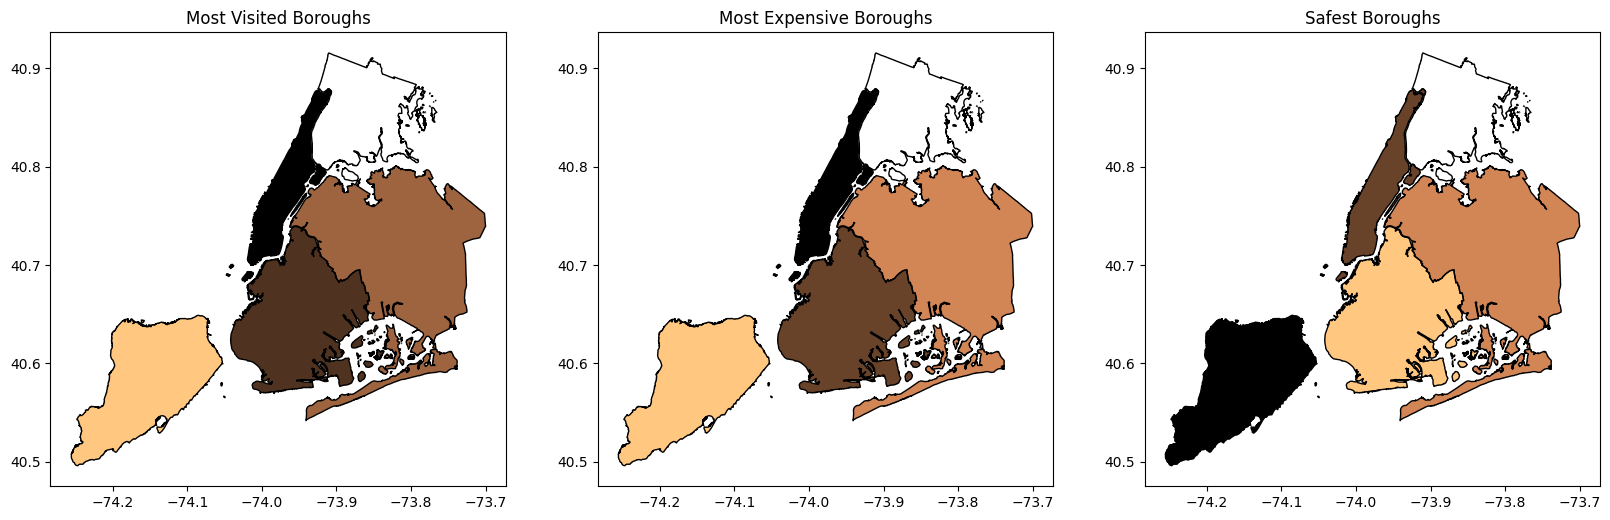

In [24]:

# Step 5: Plot the three maps side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Plot 1: Most Visited
nyc.boundary.plot(ax=axes[0], linewidth=1, color='black')
nyc.plot(ax=axes[0], color=nyc['visited_color'])
axes[0].set_title('Most Visited Boroughs')

# Plot 2: Most Expensive
nyc.boundary.plot(ax=axes[1], linewidth=1, color='black')
nyc.plot(ax=axes[1], color=nyc['expensive_color'])
axes[1].set_title('Most Expensive Boroughs')

# Plot 3: Safest
nyc.boundary.plot(ax=axes[2], linewidth=1, color='black')
nyc.plot(ax=axes[2], color=nyc['safety_color'])
axes[2].set_title('Safest Boroughs')

plt.show()

For any tourist, the biggest concern would be his/her safety, budget-friendly yet memorable trip.

To understand these metrics in the New York city, 3 thematic maps are plotted each of it visualizing one of these variables.

We can draw the following conclusions from these visualizations:

1. Staten island is the safest borough and can be visited with a low budget. However, not many tourists preferred visitn fstaten island

2. Manhattan on the other side appears to be the most visted borough despite being extremely expensive.

3. Queens holds the middle ground on all metrics, it is the average visited place and safe enough.

4. Brooklyn is visited by many despite its high expense and unsafe surroundings

5. Bronx is the least preferred and less-known borough of NYC which is least safe and least expensive

In [17]:
!pip install emoji

In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile into a GeoDataFrame (replace with your actual shapefile path)
# shapefile_path = "path_to_shapefile.shp"
# nyc = gpd.read_file(shapefile_path)

# Dissolve the geometries by the 'boro_name' to combine into single geometry per borough
nyc_dissolved = nyc.dissolve(by='boro_name')

# Calculate the centroid of each borough
nyc_dissolved['centroid'] = nyc_dissolved.geometry.centroid

# Display the centroid coordinates for each borough
for idx, row in nyc_dissolved.iterrows():
    boro_name = idx  # 'idx' is now the borough name after dissolving
    centroid = row['centroid']
    print(f"{boro_name}: Latitude = {centroid.y:.4f}, Longitude = {centroid.x:.4f}")


Bronx: Latitude = 40.8526, Longitude = -73.8665
Brooklyn: Latitude = 40.6448, Longitude = -73.9478
Manhattan: Latitude = 40.7773, Longitude = -73.9672
Queens: Latitude = 40.7077, Longitude = -73.8186
Staten Island: Latitude = 40.5808, Longitude = -74.1534


<ipython-input-14-3d5abf987f0b>:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nyc_dissolved['centroid'] = nyc_dissolved.geometry.centroid


In [15]:
# Define the emojis for each borough manually
borough_emojis = {
    'Bronx': '\U0001F3C0 \U0001F418 \U0001F33F',  # 🏀 🐘 🌿
    'Brooklyn': '\U0001F309 \U0001F3A1 \U0001F3A8',  # 🌉 🎡 🎨
    'Manhattan': '\U0001F5FD \U0001F3AD \U0001F3D9',  # 🗽 🎭 🏙️
    'Queens': '\U0001F30D \U0001F3A5 \U0001F35A',  # 🌍 🎥 🍲
    'Staten Island': '\U0001F6F3 \U0001F3F0 \U0001F3DE'  # 🛳️ 🏰 🏞️
}

# Provided centroid coordinates for each borough
borough_centroids = {
    'Bronx': {'lat': 40.8448, 'lon': -73.8648},
    'Brooklyn': {'lat': 40.6782, 'lon': -73.9442},
    'Manhattan': {'lat': 40.7831, 'lon': -73.9712},
    'Queens': {'lat': 40.7282, 'lon': -73.7949},
    'Staten Island': {'lat': 40.5795, 'lon': -74.1502}
}

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 'New York City and Its Boroughs')

Text(0.5, 23.52222222222222, 'Longitude')

Text(96.39215564756849, 0.5, 'Latitude')

Text(-73.8648, 40.8448, '🏀 🐘 🌿')

Text(-73.9442, 40.6782, '🌉 🎡 🎨')

Text(-73.9712, 40.7831, '🗽 🎭 🏙')

Text(-73.7949, 40.7282, '🌍 🎥 🍚')

Text(-74.1502, 40.5795, '🛳 🏰 🏞')

<Figure size 1000x800 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128024 (\N{ELEPHANT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127807 (\N{HERB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127753 (\N{BRIDGE AT NIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127905 (\N{FERRIS WHEEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: 

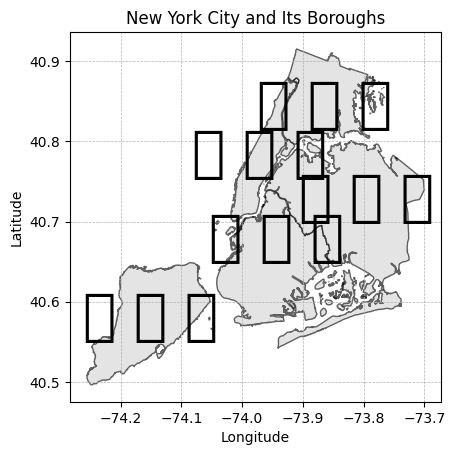

In [16]:

# Dissolve the geometries by the 'boro_name' to combine into single geometry per borough
nyc_dissolved = nyc.dissolve(by='boro_name')

# Plotting NYC map with borough boundaries
plt.figure(figsize=(10, 8))
ax = nyc_dissolved.plot(
    color='lightgrey', edgecolor='black', alpha=0.6, legend=False
)

# Additional styling
ax.set_title('New York City and Its Boroughs')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Place manually assigned emojis at the predefined centroid of each borough
for boro_name, coords in borough_centroids.items():
    emojis = borough_emojis.get(boro_name, '')  # Get emojis from the dictionary
    plt.text(coords['lon'], coords['lat'], emojis, fontsize=40, ha='center', va='center')  # Increased fontsize

plt.show()

(The emojis are successfully not displayed, however I am still trying to make it possible or look for another alternative)